<a href="https://colab.research.google.com/github/ChrisM-Git/AI/blob/main/OpenAI_Tuning_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tiktoken
! pip install matplotlib
! pip install wordcloud
! pip install nltk
! pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
df = pd.read_csv("bbc.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2232 non-null   object
 1   text      2232 non-null   object
dtypes: object(2)
memory usage: 35.0+ KB


In [4]:
df.describe()

,category,text
count,2232,2232
unique,5,2124
top,business,tautou to star in da vinci film french actre...
freq,512,2


In [5]:
label_counts = df['category'].value_counts()
print(label_counts)

category
business         512
sport            512
politics         421
tech             400
entertainment    387
Name: count, dtype: int64


In [6]:
len(df["text"])

2234

In [7]:
len(df["text"].unique())

2125

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
len(df["text"])

2126

In [10]:
null_counts = df.isnull().sum()
print("count of each value in each column:\n", null_counts)

count of each value in each column:
 category    2
text        2
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
target_label = 'tech'
target_df = df [df['category']== target_label]

In [15]:
# Choose the label for which you want to create the word cloud
target_words = [word.lower() for text in target_df['text']
                for word in word_tokenize(text)
                if word.isalnum() and word.lower() not in stopwords.words('english')]

target_word_counts = Counter(target_words)
print(target_word_counts)

Counter({'said': 1362, 'people': 822, 'also': 459, 'technology': 449, 'new': 447, 'mr': 445, 'one': 434, 'could': 422, 'mobile': 420, 'would': 412, 'games': 375, 'users': 343, 'use': 336, 'us': 328, 'many': 310, 'music': 310, 'game': 309, 'net': 306, 'digital': 298, 'software': 298, 'year': 295, 'phone': 292, 'like': 287, 'online': 285, 'make': 279, 'get': 272, 'world': 268, 'computer': 260, 'time': 256, 'used': 254, 'uk': 251, 'tv': 244, 'video': 241, 'way': 239, 'service': 233, 'microsoft': 228, 'broadband': 225, 'first': 225, 'internet': 222, 'million': 218, 'using': 216, 'data': 212, 'information': 198, 'system': 193, 'phones': 193, 'market': 189, 'services': 187, 'number': 185, 'security': 182, 'says': 181, 'much': 175, 'search': 174, 'around': 169, 'according': 168, 'content': 168, 'firm': 168, 'companies': 167, 'last': 167, 'apple': 167, 'two': 166, 'work': 165, 'media': 165, 'networks': 163, 'news': 162, 'players': 161, 'pc': 161, 'take': 160, 'research': 159, 'next': 159, '000

In [16]:
word_cloud = WordCloud().generate_from_frequencies(target_word_counts)

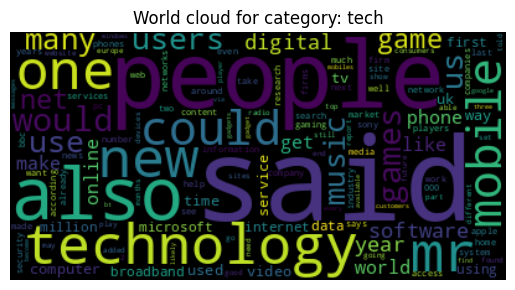

In [17]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title(f"World cloud for category: {target_label}")
plt.show()

In [18]:
import tiktoken

In [19]:
def cal_num_tokens_from_row(string: str, encoding_name: str) -> int:
    encoding = tiktoken.encoding_for_model(encoding_name)
    token_count = len(encoding.encode(string))
    return token_count

def cal_num_tokens_from_df(df, encoding_name: str) -> int:
    total_tokens = 0
    for text in df['text']:
        total_tokens += cal_num_tokens_from_row (text, encoding_name)
    return total_tokens


In [20]:
total_tokens = cal_num_tokens_from_df(df, "gpt-3.5-turbo")
print(f"total numbver of tokens in the dataframe: {total_tokens}")

total numbver of tokens in the dataframe: 1051754


In [21]:
import csv
import os
import random

In [22]:
os.makedirs('dataset', exist_ok=True)

In [23]:
rows = [{'text': row['text'].strip(),
                    'label': row['category'],
                    } for idx, row in df.iterrows()]


In [24]:
random.seed(42)
random.shuffle(rows)

In [25]:
num_test = 500
splits = {'test':rows[0:num_test], 'train':rows[num_test:]}

In [26]:
for split in ['train', 'test']:
    with open(f'dataset/{split}.csv', 'w', newline='') as fOut:
        writer = csv.DictWriter(fOut, fieldnames=['text', 'label'])
        writer.writeheader()
        for row in splits[split]:
            writer.writerow(row)


In [27]:
import json
df = pd.read_csv("dataset/test.csv", encoding='unicode_escape')
final_df = df.head(500)
total_tokens = cal_num_tokens_from_df(final_df, "gpt-3.5-turbo")
print(f"total numbver of tokens in the dataframe: {total_tokens}")

total numbver of tokens in the dataframe: 251377


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   label   500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [30]:
system = "You are a intelligent assistant designed to classify news articles into these categories: business, entertainment, politics, sport, tech"
with open("test.jsonl", "w") as outfile:
    for _, row in final_df.iterrows():
        openai_format = {
            "messages": [
                {"role": "system", "content": system},
                {"role": "user", "content": row["text"]},
                {"role": "assistant", "content": row["label"]}
            ]
        }
        json.dump(openai_format, outfile)
        outfile.write('\n')